<a href="https://colab.research.google.com/github/tejasvipv/Data-Science-projects/blob/main/DL/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, datasets

In [ ]:
(training_images, training_labels), (testing_images, testing_labels) = datasets.cifar10.load_data()   # pixels are activated from 0 yo 255
print(training_images.shape, training_labels.shape)
print(testing_images.shape, testing_labels.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


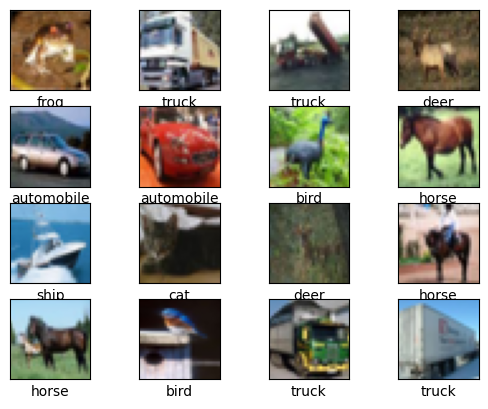

In [ ]:
training_images, testing_images = training_images / 255, testing_images / 255
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

for i in range(16):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(training_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[training_labels[i][0]])
plt.show()

For pictures cnn is used and layers like maxpooling, conv2d is used.

In [ ]:
training_images = training_images[:20000]    # it can be 5000 instead of 20000 but the accuracy goes down the less example fed into the network
training_labels = training_labels[:20000]
testing_images = testing_images[:4000]
testing_labels = testing_labels[:4000]

model = models.Sequential()  # A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))      # input layer
model.add(layers.MaxPooling2D((2,2)))         # max pooling 2d layer which simplifies the result and reduces it to the essential information
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())                   # flatten the previous layer to make the 1 layer
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10, validation_data=(testing_images, testing_labels))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 44ms/step - accuracy: 0.2662 - loss: 1.9642 - val_accuracy: 0.4557 - val_loss: 1.4989
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.4860 - loss: 1.4155 - val_accuracy: 0.5297 - val_loss: 1.3337
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.5587 - loss: 1.2526 - val_accuracy: 0.5617 - val_loss: 1.2143
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.5965 - loss: 1.1542 - val_accuracy: 0.5838 - val_loss: 1.1522
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.6351 - loss: 1.0467 - val_accuracy: 0.6000 - val_loss: 1.1366
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.6551 - loss: 0.9749 - val_accuracy: 0.6255 - val_loss: 1.0669
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.6888 - loss: 0.8859 - val_accuracy: 0.6340 - val_loss: 1.0569
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.7082 - loss: 0.8307 - 

In [ ]:
loss, accuracy = model.evaluate(testing_images, testing_labels)
print(f"Loss: {loss}")              # loss indicating how wrong our model is
print(f"Accuracy: {accuracy}")      # accuracy how much % of testing examples were classified coreectly

125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7319 - loss: 0.8218
Loss: 0.8380953073501587
Accuracy: 0.7272499799728394


In [ ]:
model.save('image_classifier.h5')  # or model.save('image_classifier.keras')

# Another segementation

take the steps from first but exclude from step model.sequential till above step model.save

Because now we are testing the model which we trained with randaom images from internet

In [ ]:
model = models.load_model('image_classifier.h5')

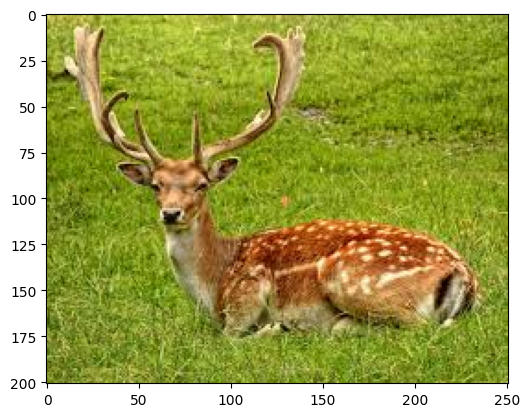

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Prediction: deer


In [ ]:
img = cv.imread('deer1.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img, cmap=plt.cm.binary)
plt.show()

img = cv.resize(img, (32, 32))
prediction = model.predict(np.array([img]) / 255)
index = np.argmax(prediction)
print(f"Prediction: {class_names[index]}")